# 1. 마포구 아파트 거래금액 예측을 위한 최적의 machine learning 모형 찾기
- data: kaggle의 Korean Apartment Deal Data  
(출처:https://www.kaggle.com/brainer3220/korean-real-estate-transaction-data)    

- 프로젝트 목적: 본 분석에서는 개별 아파트의 특징(위치, 크기, 층수, 건축년도 등)이 아파트 거래금액에 영향을 미치는지 알아보고, 마포구 아파트 거래금액 예측을 위한 최적 머신러닝 모형을 찾고자 한다.

분석에 필요한 라이브러리

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.svm import LinearSVR
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import math


## 1) 데이터 불러오기

In [2]:
df = 'C:/Users/82105/Downloads/Apart Deal.csv'
df = pd.read_csv(df)
df

C:\Users\82105\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991,26700
1,31110,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006,35500
2,31110,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007,36500
3,31110,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006,43000
4,31110,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007,38700
...,...,...,...,...,...,...,...,...,...
4315698,50110,애월읍 하귀1리,2021-04-07 00:00:00,제주하귀휴먼시아2단지,166-1,84.8400,7,2010,38500
4315699,50110,한림읍 한림리,2021-04-06 00:00:00,영신,1530-2,84.8700,4,1991,12000
4315700,50130,동홍동,2021-03-26 00:00:00,동호아트리움,2196,74.9261,3,2019,32500
4315701,50130,동홍동,2021-03-29 00:00:00,동홍동코아루,157,60.9375,3,2013,24100


In [3]:
df = 'C:/Users/82105/Downloads/Apart Deal.csv'
df = pd.read_csv(df)
df = df.drop(['지역코드'], axis = 1)
df = df.rename({'법정동':'dong', 
                '거래일':'trading_day', 
                '아파트':'apartment', 
                '지번':'lot_number', 
                '전용면적':'exclusive_area', 
                '층':'floor', 
                '건축년도':'construction_year', 
                '거래금액':'transaction_amount'},
               axis='columns')
df.head()

C:\Users\82105\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,dong,trading_day,apartment,lot_number,exclusive_area,floor,construction_year,transaction_amount
0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991,26700
1,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006,35500
2,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007,36500
3,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006,43000
4,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007,38700


지역코드(area_code) 변수는 API를 불러올 때 사용한 코드로 데이터 분석에서는 의미없기 때문에 제거한 후 데이터를 불러온다.

다음으로 본 분석에서는 서울시 마포구의 아파트 거래 금액을 예측하는 것이 목표이므로 전체 데이터 중 서울시 마포구의 법정동만 남기는 과정이다.

In [4]:
mapo = '용강동|노고산동|하중동|공덕동|신공덕동|도화동|마포동|망원동|합정동|신수동|현석동|당인동|성산동|상암동|연남동|서교동|동교동|염리동'

In [5]:
df = df.loc[df['dong'].str.match(mapo)]
df.head()


,dong,trading_day,apartment,lot_number,exclusive_area,floor,construction_year,transaction_amount
73069,합정동,1/1/2020 0:00,주공,835,47.01,6,1989,13000
73070,합정동,1/3/2020 0:00,주공,835,39.69,1,1989,11500
73071,합정동,1/3/2020 0:00,주공,835,46.68,5,1989,12000
73072,합정동,1/3/2020 0:00,주공,835,39.69,5,1989,10500
73073,합정동,1/3/2020 0:00,주공,835,39.69,3,1989,10900


In [6]:
len(df)

23425

23425개의 마포구 데이터만 추출해냈다.

## 2) 데이터 훑어보기

다음은 위에서 추출해낸 마포구 데이터를 살펴보았다.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23425 entries, 73069 to 4315364
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dong                23425 non-null  object 
 1   trading_day         23425 non-null  object 
 2   apartment           23425 non-null  object 
 3   lot_number          23425 non-null  object 
 4   exclusive_area      23425 non-null  float64
 5   floor               23425 non-null  object 
 6   construction_year   23425 non-null  int64  
 7   transaction_amount  23425 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 1.6+ MB


In [8]:
df.isnull().sum()

dong                  0
trading_day           0
apartment             0
lot_number            0
exclusive_area        0
floor                 0
construction_year     0
transaction_amount    0
dtype: int64

총 8개의 변수로 이루어져 있으며, 연속형 변수 3개와 범주형 변수 5개로 이루어져있다.  
결측치는 존재하지 않는다.

- 범주형 변수 살펴보기

In [9]:
df["dong"].value_counts().head(10)

도화동     3832
용강동     3647
합정동     2287
공덕동     2051
성산동     1882
상암동     1778
신공덕동    1617
하중동     1442
망원동     1325
신수동      837
Name: dong, dtype: int64

도화동의 아파트 거래가 가장 많고 그 다음으로 용강동,합정동,공덕동 순이다.

In [10]:
df["apartment"].value_counts().head(8)

주공          767
협성휴포레 용황    618
도화동현대       472
참이슬마을       467
우성          444
성산시영(대우)    411
현대홈타운       390
참이슬         390
Name: apartment, dtype: int64

주공아파트의 거래가 가장 많고, 그리고 협성휴포레 용황, 도화동현대 순이다.

In [11]:
df.groupby("dong")['transaction_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
dong,,,,,,,,
공덕동,2051.0,76465.176012,30861.129384,16500.0,56750.0,69000.0,90000.0,310000.0
노고산동,150.0,27679.666667,3685.315030,16500.0,25925.0,27850.0,29500.0,49000.0
도화동,3832.0,43732.780532,28827.027450,4500.0,17675.0,41000.0,61900.0,178000.0
동교동,10.0,63545.000000,14810.590243,40000.0,50750.0,68750.0,72525.0,82000.0
마포동,311.0,44020.257235,20874.873071,8560.0,33125.0,43000.0,57750.0,105000.0
망원동,1325.0,48631.177358,15032.150644,13500.0,39000.0,47000.0,56500.0,143800.0
상암동,1778.0,72657.798650,16446.449758,25639.0,60000.0,70500.0,84000.0,134800.0
서교동,602.0,93117.971761,58518.605835,20300.0,36575.0,76000.0,147800.0,338000.0
성산동,1882.0,52314.399575,15490.336003,13000.0,41025.0,49500.0,59800.0,111000.0


아파트가 위치한 동 별 거래금액을 확인한 결과, 같은 마포구에 위치한 아파트여도 거래건수와 거래금액의 편차가 큰 것을 확인할 수 있었다.<br>   따라서 동은 아파트 거래금액에 영향을 미치는 변수로 판단한다.

In [12]:
df.groupby("floor")['transaction_amount'].describe().sort_values(by="count", ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
floor,,,,,,,,
4,1895.0,42227.544063,29907.286571,4400.0,15250.0,37700.0,62000.0,156000.0
5,1782.0,41835.752525,30945.860927,4000.0,14500.0,35750.0,61225.0,190000.0
3,1717.0,42137.851485,29743.456094,4300.0,16000.0,37500.0,59500.0,170000.0
2,1682.0,40956.056480,29267.428429,5000.0,14500.0,36400.0,59500.0,170000.0
6,1558.0,46778.892169,30109.733420,4000.0,20000.0,44000.0,65000.0,199000.0
1,1436.0,38294.199164,27362.482036,1700.0,14000.0,32100.0,57000.0,155000.0
7,1429.0,50847.526942,32601.619577,5200.0,24000.0,47800.0,69000.0,200000.0
8,1344.0,52609.113839,31321.486356,5300.0,26000.0,50000.0,72000.0,210000.0
9,1251.0,52813.147082,31027.102873,5000.0,26041.5,50800.0,73200.0,182500.0


1~11층까지의 거래가 가장 많고, 고층일수록 아파트 거래금액의 평균이 높아진다.   특히 1층의 거래금액이 가장 낮은 것을 확인할 수 있다. 

- 연속형 변수 살펴보기

In [13]:
df.describe()

,exclusive_area,construction_year,transaction_amount
count,23425.000000,23425.000000,23425.000000
mean,76.120076,2001.540704,51008.172337
std,26.367882,8.718125,35009.555819
min,14.030000,1970.000000,1700.000000
25%,59.520000,1996.000000,22100.000000
50%,79.137600,2003.000000,46500.000000
75%,84.950000,2007.000000,70400.000000
max,256.170000,2020.000000,338000.000000


평균 전용 면적은 76제곱미터(약 23평)이고, 평균 준공년도는 2001년이다. 그리고 평균 거래 금액은 51008만원(약 5.1억원)이다.

array([[<AxesSubplot:title={'center':'exclusive_area'}>,
        <AxesSubplot:title={'center':'construction_year'}>],
       [<AxesSubplot:title={'center':'transaction_amount'}>,
        <AxesSubplot:>]], dtype=object)

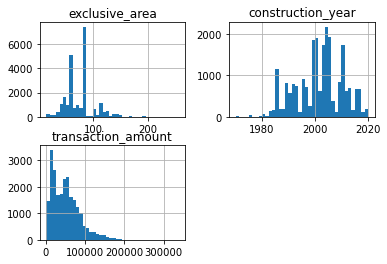

In [14]:
import matplotlib.pyplot as plt
df.hist(bins=40)

특성들의 scale이 서로 매우 다른 것을 확인할 수 있다.

- 상관관계 조사

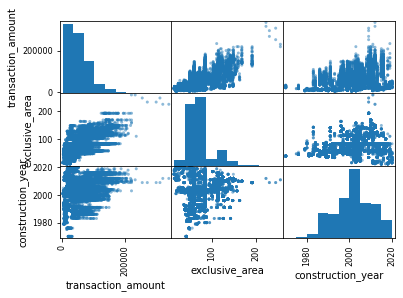

In [15]:
corr_matrix = df.corr()
corr_matrix["transaction_amount"].sort_values(ascending=False)

from pandas.plotting import scatter_matrix
attributes = ['transaction_amount', 'exclusive_area', 'construction_year']
scatter_matrix(df[attributes])
plt.show()

전용면적이 클수록 거래금액이 증가하며, 신축 아파트 중 거래금액이 매우 높은 아파트들이 있는 것을 확인할 수 있다.

## 3) 데이터 정제

In [16]:
df['trading_year'] = pd.DatetimeIndex(df['trading_day']).year
df['old'] = 2021-df['construction_year']
df = df.drop(['trading_day','apartment', 'construction_year'], axis = 1)
df.head()

,dong,lot_number,exclusive_area,floor,transaction_amount,trading_year,old
73069,합정동,835,47.01,6,13000,2020,32
73070,합정동,835,39.69,1,11500,2020,32
73071,합정동,835,46.68,5,12000,2020,32
73072,합정동,835,39.69,5,10500,2020,32
73073,합정동,835,39.69,3,10900,2020,32


거래일자(trading_day)에서 연도만 추출해내 새로운 변수 trading_year를 생성한 후, 기존의 trading_day 변수는 삭제하였다.<br> 
또한, 2021년에서 건축 연도(construction_year)를 빼 몇 년 된 아파트인지 나타내는 변수 old를 생성한 후, 기존의 construction_year 변수는 삭제하였다.

마지막으로 같은 아파트는 같은 지번을 가지고 있기 때문에, apartment 변수는 삭제하고 lot_number만 가지고 분석을 진행한다.

In [17]:
df['floor'] = df['floor'].astype(float, errors = 'raise')
df['transaction_amount'] = df['transaction_amount'].astype(float, errors = 'raise')
df['trading_year'] = df['trading_year'].astype(float, errors = 'raise')
df['old'] = df['old'].astype(float, errors = 'raise')
df['lot_number']=df['lot_number'].astype(object)

'floor','transaction_amount', 'trading_year', 'old'의 type을 float로 변환하였고, lot_number의 type을 object로 변환하였다.

- OnehotEncoding

In [18]:
df = pd.get_dummies(df,prefix=['dong', 'lot_number'], 
                    columns = ['dong','lot_number'], drop_first=True)
df.head()

,exclusive_area,floor,transaction_amount,trading_year,old,dong_노고산동,dong_도화동,dong_동교동,dong_마포동,dong_망원동,...,lot_number_965-8,lot_number_970-12,lot_number_970-5,lot_number_973-15,lot_number_975-12,lot_number_975-2,lot_number_982,lot_number_984,lot_number_BL-84-1,lot_number_산50-16
73069,47.01,6.0,13000.0,2020.0,32.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73070,39.69,1.0,11500.0,2020.0,32.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73071,46.68,5.0,12000.0,2020.0,32.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73072,39.69,5.0,10500.0,2020.0,32.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73073,39.69,3.0,10900.0,2020.0,32.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


분석에 들어가기 앞서 범주형 변수를 OnehotEncoding하였다. 

In [19]:
X = df.drop(['transaction_amount'], axis = 1)
y = df['transaction_amount']

OnehotEncoding 후, feature 변수는 X에, target변수는 y에 저장하였다.

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)
X

array([[-1.10402108, -0.4662789 ,  1.42841015, ..., -0.06580504,
        -0.10490763, -0.01461139],
       [-1.38163747, -1.29548111,  1.42841015, ..., -0.06580504,
        -0.10490763, -0.01461139],
       [-1.11653657, -0.63211934,  1.42841015, ..., -0.06580504,
        -0.10490763, -0.01461139],
       ...,
       [-0.39177575,  1.02628508,  1.98240124, ..., -0.06580504,
        -0.10490763, -0.01461139],
       [-0.39177575,  1.02628508,  1.98240124, ..., -0.06580504,
        -0.10490763, -0.01461139],
       [-0.39177575, -1.29548111,  1.98240124, ..., -0.06580504,
        -0.10490763, -0.01461139]])

변수의 scale이 모두 다르기 때문에 StandardScaler를 이용해 표준화하였다. 

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X = pca.fit_transform(X)
X

array([[-3.29544566,  2.1927101 , -0.2748585 , ..., -0.13861765,
        -0.74009821, -0.77611003],
       [-3.61303931,  2.34518499, -0.2807405 , ..., -0.16806194,
        -0.72799882, -0.74947562],
       [-3.34425733,  2.21563518, -0.27342821, ..., -0.14797948,
        -0.73971956, -0.77382603],
       ...,
       [-0.04345629,  2.55098432,  1.57926108, ..., -0.21827206,
         0.08571283, -0.39927983],
       [-0.04345629,  2.55098432,  1.57926108, ..., -0.21827206,
         0.08571283, -0.39927983],
       [-0.66690196,  2.84109506,  1.60990511, ..., -0.36348685,
         0.0826978 , -0.37970066]])

그 후, feature가 너무 많기 때문에 pca를 이용해 차원을 10으로 줄였다.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

마지막으로 training set과 test set을 8:2 비율로 나눴다. 

## 4) 모델 선택과 훈련

- linear regression
- Regression Tree
- RandomForest Regression
- SVM Regression(RBF, linear)

In [23]:
def reg_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print ('MAE train', 
           mean_absolute_error(y_train, y_pred_train))
    print ('RMSE train', 
           np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print ('MAE test', 
           mean_absolute_error(y_test, y_pred_test))
    print ('RMSE test', 
           np.sqrt(mean_squared_error(y_test, y_pred_test)))
    return name , np.array(y_test), y_pred_test

적용할 회귀 모델에 대해 train set, test set 각각의 MAE 와 RMSE를 한번에 보여주기 위해 새로운 함수 reg_model 을 만들어두었다. 


In [24]:
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=2021)
rf_reg = RandomForestRegressor(random_state=2021)
svr_rbf = SVR(kernel='rbf', gamma=0.1)
svr_linear = LinearSVR()
results = []
def run_model():
    print ('-----------')
    print ('Linear Regression')
    print ('-----------')
    results.append(reg_model('Linear Regression', lin_reg, X_train, y_train, X_test, y_test))
    print ('-----------')
    print ('DecisionTree Regressor')
    print ('-----------')
    results.append(reg_model('DecisionTree Regressor', tree_reg, X_train, y_train, X_test, y_test))
    print ('-----------')
    print ('Randomforest Regressor')
    print ('-----------')
    results.append(reg_model('Randomforest Regressor', rf_reg, X_train, y_train, X_test, y_test))
    print ('-----------')
    print ('SVR - RBF')
    print ('-----------')
    results.append(reg_model('SVR - RBF', svr_rbf, X_train, y_train, X_test, y_test))
    print ('-----------')
    print ('SVR - linear')
    print ('-----------')
    results.append(reg_model('SVR - linear', svr_linear, X_train, y_train, X_test, y_test))


In [25]:
run_model()

-----------
Linear Regression
-----------
MAE train 19453.164403965315
RMSE train 25962.014858652794
MAE test 19337.583236349466
RMSE test 25878.520874892285
-----------
DecisionTree Regressor
-----------
MAE train 643.0668385238865
RMSE train 1635.8343407169152
MAE test 4182.222196229577
RMSE test 9252.231702007117
-----------
Randomforest Regressor
-----------
MAE train 1662.7440253300729
RMSE train 3011.8905374626484
MAE test 3415.928985931004
RMSE test 6390.186588886438
-----------
SVR - RBF
-----------
MAE train 26875.983129813394
RMSE train 34898.51777448477
MAE test 26770.934084343717
RMSE test 34877.932121133046
-----------
SVR - linear
-----------
MAE train 34573.288534435036
RMSE train 46821.52956427147
MAE test 34362.64216888763
RMSE test 46643.76590702854


regression tree의 RMSE와 random forest regression의 RMSE는 linear regression RMSE와 너무 큰 차이가 난다. <br>
또한, training set의 RMSE와 test set의 RMSE의 차이가 크게 난다.

따라서 overfitting이 의심되므로 모델 세부 튜닝을 진행한다.

### 모델 세부 튜닝- k-fold CV

- linear regression 결과

In [26]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X_test, y_test, 
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("score:", scores)
    print("mean:", scores.mean())
    print("sd:", scores.std())

display_scores(lin_rmse_scores)

score: [24343.01917623 26319.30385625 25811.15371182 25500.49600432
 25076.89640125 26871.99740845 24217.61260688 26236.10436006
 25291.29364927 29409.46180184]
mean: 25907.733897636488
sd: 1414.90005021228


linear regression을 10-fold CV한 결과 RMSE는 25907.733이다.

- regression tree 결과

In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_test, y_test, 
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("score:", scores)
    print("mean:", scores.mean())
    print("sd:", scores.std())

display_scores(tree_rmse_scores)

score: [17225.38367553 12635.03090988 14693.52802514 14521.65616733
 15819.57357818 13769.24934321 10987.12132204 16715.57897131
 18248.87225171 12647.30764636]
mean: 14726.330189069748
sd: 2178.1272754111983


regression tree를 10-fold CV한 결과 RMSE는 14726.33으로 아까에 비해 RMSE 값이 많이 커진걸로 보아 CV 전 모형은 overfitting 된 것으로 판단하였다.

- random forest 결과

In [28]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_reg, X_test, y_test, 
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("score:", scores)
    print("mean:", scores.mean())
    print("sd:", scores.std())

display_scores(forest_rmse_scores)

score: [ 9901.38615154 10024.69720829  9709.08532979  8825.78518912
  8981.10667726  9074.4290471   8379.79012468 10693.48091827
 10647.27950048 10571.04161742]
mean: 9680.808176394974
sd: 787.4511098929544


random forest regression을 10-fold CV한 결과 RMSE는 9680.8081로 아까에 비해 RMSE 값이 많이 커진걸로 보아 CV 전 모형은 overfitting 된 것으로 판단하였다.

- SVM-RBF 결과

In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svr_rbf, X_test, y_test, 
                         scoring="neg_mean_squared_error", cv=10)
svr_rbf_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("score:", scores)
    print("mean:", scores.mean())
    print("sd:", scores.std())

display_scores(svr_rbf_rmse_scores)

score: [31967.83090384 36428.61055526 33281.37054619 33748.10349895
 33232.70948795 35386.77395378 35270.26210513 37222.65016217
 35308.85643874 39191.6208531 ]
mean: 35103.878850511166
sd: 2039.588299371441


In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svr_linear, X_test, y_test, 
                         scoring="neg_mean_squared_error", cv=10)
svr_linear_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("score:", scores)
    print("mean:", scores.mean())
    print("sd:", scores.std())

display_scores(svr_linear_rmse_scores)

score: [54946.69514193 60403.26743803 56846.45127905 55346.92167161
 55728.12036087 59977.76525425 57634.01867059 59917.20826318
 58739.29954428 63255.52588343]
mean: 58279.527350722485
sd: 2524.60387558712


마지막으로 SVM을 10-fold CV한 결과 linear regression에 비해 RMSE가 너무 커 성능이 좋지 않은 모형으로 판단하였다.

CV 결과 random forest 모형이 가장 좋다.

### 모델 세부 튜닝 - 그리드 탐색

CV 결과 random forest regression 모형의 성능이 가장 좋기 때문에, 그리드 탐색을 통해 best parameter를 찾아보고자 한다. 

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2,4,6]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [2,4,6]}]

forest_reg = RandomForestRegressor(random_state=2021)


In [39]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2021),
             param_grid=[{'max_features': [2, 4, 6],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 4, 6],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [40]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 30}

bootstrap은 false, max_features는 6이고 n_estimators는 30인 조합이 가장 최적이다.

In [41]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

5849.536862525372

## 5) 결론

- 결론: optimal 모형은 random forest regression의 파라미터가 {'max_features': 6, 'n_estimators': 30}인 모형이고, 이 때 rmse 값은 5849.537이다.


- 느낀점: 이번 분석을 진행하며, 실제 아파트 거래금액에 대한 데이터를 이용해 EDA 하는 과정에서 흥미로운 인사이트들을 얻을 수 있었다.<br>
하지만, 한가지 아쉬운 점은 데이터에서 거래금액이 전세가와 매매가가 섞여 있어 거래금액의 분산이 너무 컸다. <br>
따라서, 매매가와 전세가가 구분된 데이터라면 더 성능이 좋은 모형을 만들 수 있었을 것이라 예상한다.
